# TREE BASED ALG-CAPSTONE PROJECT ON "USED CAR PRICE PREDICTION" - GROUP 2

In [2]:
#import required libraries
    
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
! pip install streamlit
! streamlit hello

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 4.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 2.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 3.0 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 4.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.8/812.8 kB 4.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.4/336.4 kB 3.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19567

      Successfully uninstalled typing-extensions-3.7.4.3

  👋 Welcome to Streamlit!

  If you're one of our development partners or you're interested in getting
  personal technical support or Streamlit updates, please enter your email
  address below. Otherwise, you may leave the field blank.

  Email: 

In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
 #Checking for null values
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

<AxesSubplot:>

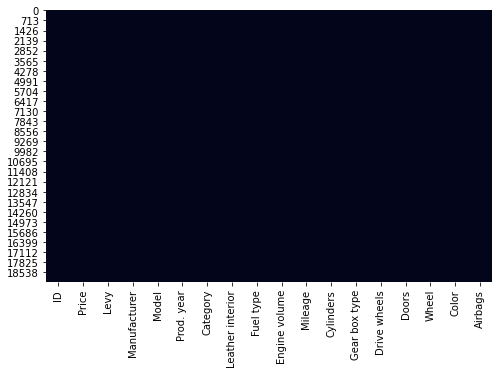

In [8]:
#Cehcking for null values in heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(),cbar=False)

INFERENCE : There are no missing values in the varibales ,however it further needs to be investigated in the dataset ,missing value might be available

In [9]:
#Checking duplicates

df.duplicated().sum()

#There are 313 duplicates value out of 19237 rows , roughly 1.62% values ,hence dropping the duplicate values

df.drop_duplicates(keep=False,inplace=True)
df.duplicated().sum()

0

INFERENCE :We found 313 duplicate entries & hence the same entries have been dropped ,after dropping the duplicates we are left with 18704 rows

In [10]:
# Lets drop the column ID

df.drop('ID',axis=1,inplace=True)

In [11]:
#Dropping duplicates

#df.drop(df[df.duplicated()].index,inplace=True)

In [12]:
df.shape

(18704, 17)

In [13]:
# Lets reset the index 
#df.reset_index(inplace=True)

In [14]:
# Lets drop the column Index
#df.drop('index',axis=1,inplace=True)

In [15]:
#Checking datatypes
df.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [16]:
#As we need to change the datatype of 'Levy' column ,we need to check the variable for any wrong values

df['Levy'].value_counts()

-       5651
765      481
891      448
639      396
640      391
        ... 
2269       1
866        1
7058       1
972        1
3329       1
Name: Levy, Length: 559, dtype: int64

In [17]:
#As we can see that the variable contains a wrong value which is '-' ,

#we need to impute the '-' with null values so that we can carry out the datatype converrrsion

df['Levy'].replace("-",np.nan,inplace=True)

#Since this seems to be an object column ,Lets try and convert it into numeric

df['Levy']=pd.to_numeric(df['Levy'])

In [18]:
# Imputing null values with 0 considering the Levy for those particular Cars as zero

df['Levy'].replace(np.nan,0,inplace=True)

In [19]:
df.describe()['Levy']

count    18704.000000
mean       632.444985
std        569.018150
min          0.000000
25%          0.000000
50%        642.000000
75%        915.000000
max      11714.000000
Name: Levy, dtype: float64

In [20]:
#Since the Levy column is assumed to be Tax applied on the cars price ,this column will be dropped from analysis citing following 
#Reasons

#There are extreme outliers in the Levy column also

#1.The Prediction of car price can be done using the price variable only excluding the tax as the tax is applied on the basic price of the car.

#2.Tax percentage on the used cars varies from states-to-states in the US ,since our dataset doesn't contain the geographical location information of the cars the Levy variable should be dropped

#df.drop('Levy',axis=1,inplace=True)

In [21]:
#Checking for Engine Volume column
df['Engine volume'].value_counts()

2            3807
2.5          2223
1.8          1726
1.6          1430
1.5          1268
             ... 
1.1 Turbo       1
6.8             1
0.8 Turbo       1
7.3             1
0.3 Turbo       1
Name: Engine volume, Length: 107, dtype: int64

INFERENCCE : We can see that there 2 values with a string named 'Turbo' right next to varibale value ,seem to have been an unnecessary input.

In [22]:
#Lets remove 'Turbo' string & convert the Engine volume datatype from 'Object' to 'float'

df['Engine volume']=df['Engine volume'].apply(lambda x:x.split(' ')[0])
df['Engine volume']=df['Engine volume'].astype('float')

In [23]:
#Recheck removal of string 'Turbo'
df['Engine volume'].value_counts()

2.0    4206
2.5    2313
1.8    1899
1.6    1546
1.5    1331
       ... 
3.1       1
0.5       1
6.8       1
6.7       1
5.2       1
Name: Engine volume, Length: 65, dtype: int64

In [24]:
#Recheck the dattype conversion
df['Engine volume'].dtypes

dtype('float64')

In [25]:
df['Mileage'].value_counts()

0 km         712
200000 km    179
150000 km    157
160000 km    120
180000 km    116
            ... 
148769 km      1
89617 km       1
52320 km       1
19050 km       1
18700 km       1
Name: Mileage, Length: 7586, dtype: int64

INFERENCE : We can see that there values with a string named 'km' right next to varibale value in almost each entry ,seem to have been an uneessary input 

In [26]:
#Lets remove 'km' string & convert the Milleage datatype from 'Object' to 'float'
df['Mileage']=df['Mileage'].apply(lambda x:x.split(' ')[0])
df['Mileage']=df['Mileage'].astype('float')

In [27]:
#Recheck removal of string 'km'
df['Mileage'].value_counts()

0.0          712
200000.0     179
150000.0     157
160000.0     120
180000.0     116
            ... 
1100000.0      1
125047.0       1
56629.0        1
82990.0        1
165442.0       1
Name: Mileage, Length: 7586, dtype: int64

In [28]:
#Recheck the datatype conversion
df['Mileage'].dtypes

dtype('float64')

link : https://www.valulinecars.com/content/good-mileage-on-a-used-car#:~:text=Mileage%20will%20vary%20between%20vehicles,that's%20about%2010%20years%20old.

In [29]:
#Checking Drive wheels column

df['Drive wheels'].value_counts()

Front    12553
4x4       3922
Rear      2229
Name: Drive wheels, dtype: int64

INFERENCE : Drive Wheels seems okay as a categorical column , no changes required

In [30]:
#Doors column seems to be unclean ,lets clean it 

df['Doors'].value_counts()

04-May    17822
02-Mar      759
>5          123
Name: Doors, dtype: int64

INFERENCE : The Door column typicaly should contain number of doors but we can see that the values are inserted wrongly

In [31]:
#Asumption 1: '04-May' means '4-5' Doors

#Asumption 2: '02-Mar' means '2-3' Doors

#Asumption 3: '>5' means '<=5' Doors

In [32]:
#Lets clean the column by imputing correct values

df['Doors'].replace('04-May','4-5',inplace=True)
df['Doors'].replace('02-Mar','2-3',inplace=True)
df['Doors'].replace('>5','<=5',inplace=True)

In [33]:
df['Doors'].value_counts()

4-5    17822
2-3      759
<=5      123
Name: Doors, dtype: int64

In [34]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4-5,Left wheel,Silver,12
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,4-5,Right-hand drive,Black,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4-5,Left wheel,White,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,4-5,Left wheel,Silver,4
5,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,160931.0,4.0,Automatic,Front,4-5,Left wheel,White,4


In [35]:
#Lets convert the column Prod Year into age of the car, Considering the data was published in the year of 2021 , We shall consider
#Age of the cars from the year of manufacturing till 2021 as individual car's age

In [36]:
#Converting the Prod year column to age of the cars in years

df['Age']=2021-df['Prod. year']

In [37]:
#Lest drop production year column now

df.drop('Prod. year',axis=1,inplace=True)

In [38]:
df.shape

(18704, 17)

# UNIVARIATE & BI-VARIATE ANALYSIS

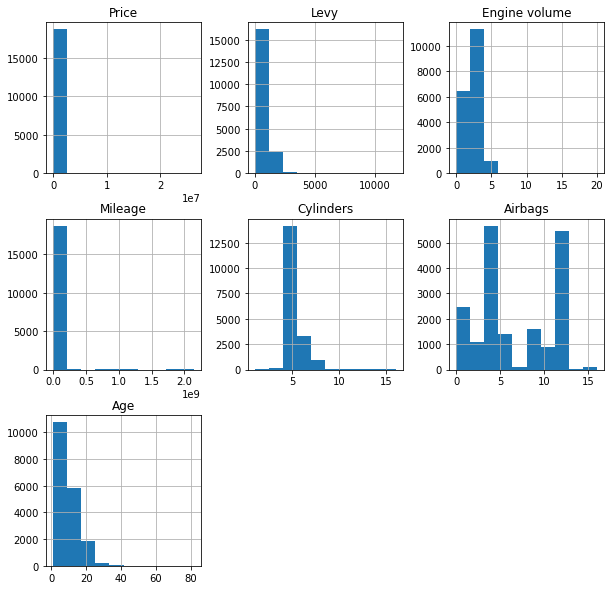

In [39]:
plt.rcParams['figure.figsize']=[10,10]
df.select_dtypes(include=np.number).hist()
plt.show()

In [40]:
#Checking skewness

df.select_dtypes(include=np.number).skew()

Price            134.620020
Levy               2.421327
Engine volume      2.218416
Mileage           38.353208
Cylinders          2.114989
Airbags            0.088982
Age                2.085867
dtype: float64

1.Column Price & Mileage --> Heavily Right Skewed

2.Column Engine Volume & Cylinder --> Right Skewed

3.Age ---> Right Skewed

4.Column Airbags --> Close to normal distrubtion

In [41]:
#Checking Kurtosis

df.select_dtypes(include=np.number).kurt()

Price            18312.655122
Levy                29.783446
Engine volume       19.771846
Mileage           1554.338145
Cylinders            6.635373
Airbags             -1.330967
Age                 11.470812
dtype: float64

1.All the columns except Airbags are Leptokurtic which means heavy tails & extreme outliers

2.Column Airbag is platykurtic which means lighter tails & less extreme outliers or no outliers at all

In [42]:
#Finding indices with Engine volume as '0' which is practically not possible

df[df['Engine volume']==0].index

Int64Index([2010, 3105, 3516, 4814, 7022, 7685, 10603, 12917, 14642, 17375], dtype='int64')

In [43]:
#Dropping the rows with Engine voume as '0'

df.drop([2010, 3105, 3516, 4814, 7685, 10603, 12917, 14642, 17375],axis=0,inplace=True)

In [44]:
#Putting manufacturer's as per Luxary cars segment

df['Manufacturer'].replace(['MERCEDES-BENZ','PORSCHE','LEXUS','AUDI','BMW','LAND ROVER','MINI','JAGUAR','TESLA','CADILLAC',
'BENTLEY','VOLVO','HUMMER','CITROEN','ROVER','MASERATI','FERRARI','LAMBORGHINI','ROLLS-ROYCE','ASTON MARTIN'],
'Luxary',inplace=True)

#Putting rest of the manufacturer's in non-Luxary cars segment

df['Manufacturer'].replace(['HONDA', 'FORD', 'HYUNDAI', 'TOYOTA', 'OPEL', 'JEEP', 'VOLKSWAGEN', 'RENAULT', 'NISSAN', 'CHEVROLET',
'SUBARU', 'DAEWOO', 'KIA', 'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI', 'ALFA ROMEO', 'SUZUKI', 'ACURA', 
'LINCOLN', 'VAZ', 'GAZ', 'DODGE', 'CHRYSLER', 'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'PEUGEOT', 'სხვა', 'HAVAL', 'SCION', 
'UAZ', 'MERCURY', 'ZAZ', 'SEAT', 'LANCIA', 'MOSKVICH', 'SAAB', 'PONTIAC', 'SATURN', 'GREATWALL'],'Non-Luxary',inplace=True)

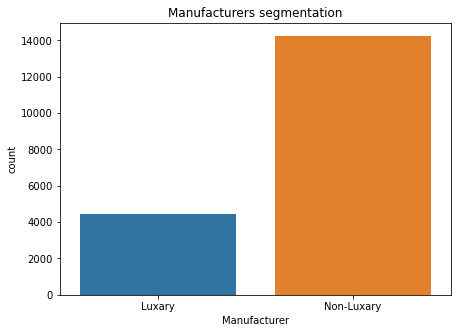

In [45]:
plt.rcParams['figure.figsize']=(7,5)
sns.countplot(df['Manufacturer'])
plt.title('Manufacturers segmentation')
plt.show()

In [46]:
#Converting categories of cars into 'other' category

df.replace(['Coupe', 'Universal','Microbus', 'Goods wagon', 'Pickup', 'Cabriolet', 'Limousine'],'Other',inplace=True)

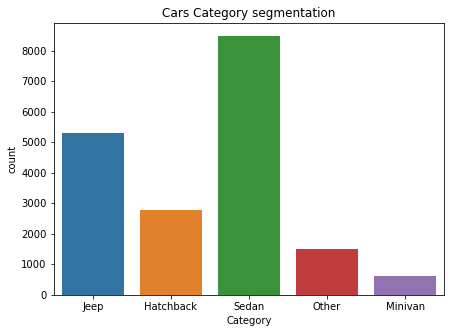

In [47]:
plt.rcParams['figure.figsize']=(7,5)
sns.countplot(df['Category'])
plt.title('Cars Category segmentation')
plt.show()

In [48]:
#Converting Fuel type of cars 'other' category

df.replace(['LPG', 'CNG', 'Plug-in Hybrid','Hydrogen'],'Other',inplace=True)

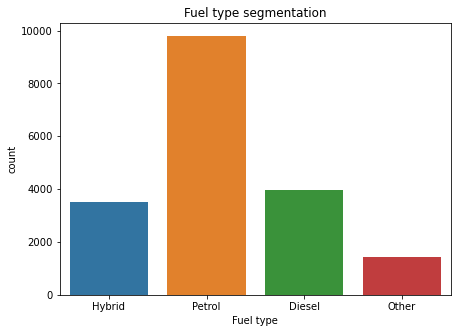

In [49]:
plt.rcParams['figure.figsize']=(7,5)
sns.countplot(df['Fuel type'])
plt.title('Fuel type segmentation')
plt.show()

In [50]:
#Converting Colors of the cars 'other' category

df.replace(['Red', 'Green', 'Orange','Brown', 'Carnelian red', 'Golden', 'Beige', 'Sky blue', 'Yellow','Purple', 'Pink'],'Other',inplace=True)

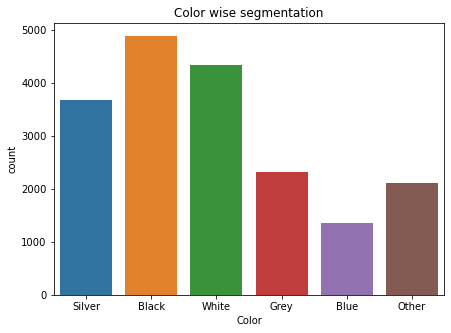

In [51]:
plt.rcParams['figure.figsize']=(7,5)
sns.countplot(df['Color'])
plt.title('Color wise segmentation')
plt.show()

In [52]:
#Dropping Models owing to large no of records

df.drop('Model',axis=1,inplace=True)

In [53]:
#Checking the skewness

df.skew()

Price            134.588631
Levy               2.421391
Engine volume      2.233960
Mileage           38.343963
Cylinders          2.115935
Airbags            0.089210
Age                2.085561
dtype: float64

In [54]:
#Treating the skewness

df_skew=df[['Levy','Engine volume','Mileage','Cylinders','Age']]
df_skew=np.power((df_skew),(1/7.1))
df_skew.skew()

Levy            -0.823338
Engine volume   -0.113154
Mileage         -0.843052
Cylinders        1.053768
Age              0.047689
dtype: float64

In [55]:
#Encoding continuos variables by get dummies

df_cat_2=df.select_dtypes('object')
df_cat=pd.get_dummies(df_cat_2,drop_first=True)

In [67]:
df_cat.head

<bound method NDFrame.head of        Manufacturer_Non-Luxary  Category_Jeep  Category_Minivan  \
0                            0              1                 0   
2                            1              0                 0   
3                            1              1                 0   
4                            1              0                 0   
5                            1              1                 0   
...                        ...            ...               ...   
19232                        0              0                 0   
19233                        1              0                 0   
19234                        1              1                 0   
19235                        1              1                 0   
19236                        1              0                 0   

       Category_Other  Category_Sedan  Leather interior_Yes  Fuel type_Hybrid  \
0                   0               0                     1                 1   
2  

In [68]:
#Concatenating all the variables

df_fin=pd.concat([df['Price'],df_skew,df['Airbags'],df_cat_2],axis=1)
df_fin.head()

,Price,Levy,Engine volume,Mileage,Cylinders,Age,Airbags,Manufacturer,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
0,13328,2.773786,1.192969,5.523147,1.287060,1.401764,12,Luxary,Jeep,Yes,Hybrid,Automatic,4x4,4-5,Left wheel,Silver
2,8467,0.000000,1.037644,5.579868,1.215618,1.464356,2,Non-Luxary,Hatchback,No,Petrol,Variator,Front,4-5,Right-hand drive,Black
3,3607,2.590906,1.137753,5.448912,1.215618,1.383073,0,Non-Luxary,Jeep,Yes,Hybrid,Automatic,4x4,4-5,Left wheel,White
4,11726,2.361271,1.037644,5.001027,1.215618,1.315309,4,Non-Luxary,Hatchback,Yes,Petrol,Automatic,Front,4-5,Left wheel,Silver
5,39493,2.603009,1.102551,5.411648,1.215618,1.254430,4,Non-Luxary,Jeep,Yes,Diesel,Automatic,Front,4-5,Left wheel,White


In [57]:
#RFE_model=RFE(DecisionTreeRegressor(),n_features_to_select=4)
#RFE_model=RFE_model.fit(X.iloc[0:,0:5],y)

In [58]:
#feat_index = pd.Series(data = RFE_model.ranking_, index = X.iloc[0:,0:5].columns)
#significant_features = feat_index[feat_index == 1].index
#significant_features

In [59]:
#Initiating variables to X,y

X=df_fin.drop('Price',axis=1)
y=df_fin['Price']

In [61]:
#Splitting the dataset in 70:30
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)

In [62]:
#Checking the data split for X variable

print(X_train.shape[0]/len(df_fin)*100)
print(X_test.shape[0]/len(df_fin)*100)

69.99732548809843
30.002674511901578


In [69]:
X_train.head()

,Levy,Engine volume,Mileage,Cylinders,Age,Airbags,Manufacturer,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Doors,Wheel,Color
8153,0.000000,1.117451,5.222454,1.215618,1.362700,1,Non-Luxary,Other,No,Diesel,Manual,Front,4-5,Left wheel,White
12677,2.553298,1.137753,5.513586,1.215618,1.315309,4,Non-Luxary,Minivan,Yes,Diesel,Automatic,Front,4-5,Left wheel,Silver
9157,2.753220,1.215618,4.901114,1.287060,1.383073,6,Non-Luxary,Jeep,Yes,Petrol,Automatic,4x4,4-5,Left wheel,Silver
4476,2.554223,1.137753,5.675015,1.215618,1.340281,12,Non-Luxary,Sedan,Yes,Hybrid,Automatic,Front,4-5,Left wheel,White
2397,2.705474,1.192969,6.019376,1.287060,1.383073,12,Non-Luxary,Jeep,Yes,Hybrid,Automatic,4x4,4-5,Left wheel,Black


In [63]:
#Checking the data split for y variable

print(y_train.shape[0]/len(df_fin)*100)
print(y_test.shape[0]/len(df_fin)*100)

69.99732548809843
30.002674511901578


In [64]:
#importing Libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# DECISION TREE REGRESSOR BASE MODEL

In [66]:
#Assigining object to Decsion Tree

DTR=DecisionTreeRegressor(random_state=1)

#fitting the model

DTR_model=DTR.fit(X_train,y_train)

#Checking the train score

print('Train r2 score :',DTR_model.score(X_train,y_train))

#Checking the test score

print('Test r2 score :',DTR_model.score(X_test,y_test))

y_pred_DT_tr=DTR_model.predict(X_train)
y_pred_DT_ts=DTR_model.predict(X_test)

print('MAE train score :',mean_absolute_error(y_train,y_pred_DT_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_DT_ts))

ValueError: could not convert string to float: 'Non-Luxary'

In [409]:
print('Train r2 score :',DTR_model.score(X_train,y_train))
print('Test r2 score :',DTR_model.score(X_test,y_test))
print('MAE train score :',mean_absolute_error(y_train,y_pred_DT_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_DT_ts))
print('MAPE train score :',mean_absolute_percentage_error(y_train,y_pred_DT_tr))
print('MAPE test score :',mean_absolute_percentage_error(y_test,y_pred_DT_ts))
print('RMSE train score :',np.sqrt(mean_absolute_error(y_train,y_pred_DT_tr)))
print('RMSE test score :',np.sqrt(mean_absolute_error(y_test,y_pred_DT_ts)))

Train r2 score : 0.9908903139294152
Test r2 score : 0.0004351542068075087
MAE train score : 202.06287114567516
MAE test score : 10994.691957906223
MAPE train score : 0.08894485610393744
MAPE test score : 6.351588073061893
RMSE train score : 14.214882030663327
RMSE test score : 104.85557666574641


In [427]:
Scorecard_1=pd.DataFrame({'Train_r2':0.99,'Test_r2':0.00,'Train_MAE':202.06,'Test_MAE':10994.69,'Train_MAPE':0.08,'Test_MAPE':6.35,'Train_RMSE':14.21,'Test_RMSE':104.85},index=['DT_Base_Model'])

# REFITTING THE DECSION TREE MODEL USING HYPER PARAMETERS GENERATED BY GRID SEARCH CV

In [428]:
DTR_GSP=DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=None,min_samples_leaf=1,min_weight_fraction_leaf=0.1,splitter='best',random_state=1)

#fitting the model

DTR_GSP_model=DTR_GSP.fit(X_train,y_train)

#Checking the train score

print('Train r2 score :',DTR_GSP_model.score(X_train,y_train))

#Checking the test score

print('Test r2 score :',DTR_GSP_model.score(X_test,y_test))

y_pred_DTGS_tr=DTR_GSP_model.predict(X_train)
y_pred_DTGS_ts=DTR_GSP_model.predict(X_test)

print('MAE train score :',mean_absolute_error(y_train,y_pred_DTGS_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_DTGS_ts))

Train r2 score : 0.14707950820916782
Test r2 score : -0.00027396392855361107
MAE train score : 10590.05533967972
MAE test score : 15234.075236599818


In [429]:
print('Train r2 score :',DTR_GSP_model.score(X_train,y_train))
print('Test r2 score :',DTR_GSP_model.score(X_test,y_test))
print('MAE train score :',mean_absolute_error(y_train,y_pred_DTGS_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_DTGS_ts))
print('MAPE train score :',mean_absolute_percentage_error(y_train,y_pred_DTGS_tr))
print('MAPE test score :',mean_absolute_percentage_error(y_test,y_pred_DTGS_ts))
print('RMSE train score :',np.sqrt(mean_absolute_error(y_train,y_pred_DTGS_tr)))
print('RMSE test score :',np.sqrt(mean_absolute_error(y_test,y_pred_DTGS_ts)))

Train r2 score : 0.14707950820916782
Test r2 score : -0.00027396392855361107
MAE train score : 10590.05533967972
MAE test score : 15234.075236599818
MAPE train score : 18.24130518769177
MAPE test score : 11.410521602853885
RMSE train score : 102.90799453725508
RMSE test score : 123.42639602856359


In [430]:
Scorecard_2=pd.DataFrame({'Train_r2':0.14,'Test_r2':-0.00,'Train_MAE':10590.05,'Test_MAE':15234.07,'Train_MAPE':18.24,'Test_MAPE':11.41,'Train_RMSE':102.90,'Test_RMSE':123.42},index=['DT_Tuned_Model'])

# RANDOM FORREST REGRESSOR BASE MODEL

In [373]:
#Assigining object to Random Forrest 

RF=RandomForestRegressor(random_state=1)

#fitting the model

RF_model=RF.fit(X_train,y_train)

#Checking the train score

print('Train r2 score :',RF_model.score(X_train,y_train))

#Checking the test score

print('Test r2 score :',RF_model.score(X_test,y_test))

y_pred_RF_tr=RF_model.predict(X_train)
y_pred_RF_ts=RF_model.predict(X_test)

print('MAE train score :',mean_absolute_error(y_train,y_pred_RF_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_RF_ts))

Train r2 score : 0.9430025004075697
Test r2 score : 0.0008499691190305692
MAE train score : 1906.858461385266
MAE test score : 9698.965368759262


In [431]:
print('Train r2 score :',RF_model.score(X_train,y_train))
print('Test r2 score :',RF_model.score(X_test,y_test))
print('MAE train score :',mean_absolute_error(y_train,y_pred_RF_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_RF_ts))
print('MAPE train score :',mean_absolute_percentage_error(y_train,y_pred_RF_tr))
print('MAPE test score :',mean_absolute_percentage_error(y_test,y_pred_RF_ts))
print('RMSE train score :',np.sqrt(mean_absolute_error(y_train,y_pred_RF_tr)))
print('RMSE test score :',np.sqrt(mean_absolute_error(y_test,y_pred_RF_ts)))

Train r2 score : 0.9430025004075697
Test r2 score : 0.0008499691190305692
MAE train score : 1906.858461385266
MAE test score : 9698.965368759262
MAPE train score : 4.887508695349441
MAPE test score : 6.068527989241535
RMSE train score : 43.66759051499483
RMSE test score : 98.48332533357747


In [447]:
Scorecard_3=pd.DataFrame({'Train_r2':0.94,'Test_r2':0.00,'Train_MAE':1906.85,'Test_MAE':9698.96,'Train_MAPE':4.88,'Test_MAPE':6.06,'Train_RMSE':43.66,'Test_RMSE':98.48},index=['RF_Base_Model'])

# REFITTING THE RANDOM FORREST TREE MODEL USING HYPER PARAMETERS GENERATED BY GRID SEARCH CV

In [374]:
RF_GS=RandomForestRegressor(max_depth=5,max_features= 'auto',max_leaf_nodes= None,min_samples_leaf= 1,min_weight_fraction_leaf= 0.1,
n_estimators= 30,random_state=1)

#fitting the model

RF_GS_model=RF_GS.fit(X_train,y_train)

#Checking the train score

print('Train r2 score :',RF_GS_model.score(X_train,y_train))

#Checking the test score

print('Test r2 score :',RF_GS_model.score(X_test,y_test))

y_pred_RFGS_tr=RF_model.predict(X_train)
y_pred_RFGS_ts=RF_model.predict(X_test)

print('MAE train score :',mean_absolute_error(y_train,y_pred_RFGS_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_RFGS_ts))

Train r2 score : 0.1801695099334948
Test r2 score : -0.000208816773523246
MAE train score : 1906.858461385266
MAE test score : 9698.965368759262


In [432]:
print('Train r2 score :',RF_GS_model.score(X_train,y_train))
print('Test r2 score :',RF_GS_model.score(X_test,y_test))
print('MAE train score :',mean_absolute_error(y_train,y_pred_RFGS_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_RFGS_ts))
print('MAPE train score :',mean_absolute_percentage_error(y_train,y_pred_RFGS_tr))
print('MAPE test score :',mean_absolute_percentage_error(y_test,y_pred_RFGS_ts))
print('RMSE train score :',np.sqrt(mean_absolute_error(y_train,y_pred_RFGS_tr)))
print('RMSE test score :',np.sqrt(mean_absolute_error(y_test,y_pred_RFGS_ts)))

Train r2 score : 0.1801695099334948
Test r2 score : -0.000208816773523246
MAE train score : 1906.858461385266
MAE test score : 9698.965368759262
MAPE train score : 4.887508695349441
MAPE test score : 6.068527989241535
RMSE train score : 43.66759051499483
RMSE test score : 98.48332533357747


In [434]:
Scorecard_4=pd.DataFrame({'Train_r2':0.18,'Test_r2':-0.00,'Train_MAE':1906.85,'Test_MAE':9698.96,'Train_MAPE':4.88,'Test_MAPE':6.06,'Train_RMSE':43.66,'Test_RMSE':98.48},index=['RF_Tuned_Model'])

# ADABOOST BASE MODEL

In [377]:
AdaB=AdaBoostRegressor(random_state=1)

#fitting the model

AdaB_model=AdaB.fit(X_train,y_train)

#Checking the train score

print('Train r2 score :',AdaB_model.score(X_train,y_train))

#Checking the test score

print('Test r2 score :',AdaB_model.score(X_test,y_test))

y_pred_AD_tr=AdaB_model.predict(X_train)
y_pred_AD_ts=AdaB_model.predict(X_test)

print('MAE train score :',mean_absolute_error(y_train,y_pred_AD_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_AD_ts))

Train r2 score : 0.3827764306612229
Test r2 score : 0.00022374819542769764
MAE train score : 11765.457715275183
MAE test score : 16524.80816883086


In [433]:
print('Train r2 score :',AdaB_model.score(X_train,y_train))
print('Test r2 score :',AdaB_model.score(X_test,y_test))
print('MAE train score :',mean_absolute_error(y_train,y_pred_AD_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_AD_ts))
print('MAPE train score :',mean_absolute_percentage_error(y_train,y_pred_AD_tr))
print('MAPE test score :',mean_absolute_percentage_error(y_test,y_pred_AD_ts))
print('RMSE train score :',np.sqrt(mean_absolute_error(y_train,y_pred_AD_tr)))
print('RMSE test score :',np.sqrt(mean_absolute_error(y_test,y_pred_AD_ts)))

Train r2 score : 0.3827764306612229
Test r2 score : 0.00022374819542769764
MAE train score : 11765.457715275183
MAE test score : 16524.80816883086
MAPE train score : 25.510442979441876
MAPE test score : 16.36221485822421
RMSE train score : 108.46869463248456
RMSE test score : 128.54885518288702


In [435]:
Scorecard_5=pd.DataFrame({'Train_r2':0.38,'Test_r2':0.00,'Train_MAE':11765.45,'Test_MAE':16524.80,'Train_MAPE':25.51,'Test_MAPE':16.36,'Train_RMSE':108.46,'Test_RMSE':128.54},index=['AdaBoost_Base_Model'])

# REFITTING ADABOOST MODEL USING HYPER PARAMETERS GENERATED BY GRID SEARCH CV

In [379]:
AdaB_GS=AdaBoostRegressor(learning_rate= 1.0, loss= 'square', n_estimators=20,random_state=1)

#fitting the model

AdaB_GS_model=AdaB_GS.fit(X_train,y_train)

#Checking the train score

print('Train r2 score :',AdaB_GS_model.score(X_train,y_train))

#Checking the test score

print('Test r2 score :',AdaB_GS_model.score(X_test,y_test))

y_pred_ADGS_tr=AdaB_GS_model.predict(X_train)
y_pred_ADGS_ts=AdaB_GS_model.predict(X_test)

print('MAE train score :',mean_absolute_error(y_train,y_pred_ADGS_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_ADGS_ts))

Train r2 score : 0.377940949893776
Test r2 score : -4.0021832589776096e-05
MAE train score : 11153.810242996602
MAE test score : 15944.321732731945


In [436]:
print('Train r2 score :',AdaB_GS_model.score(X_train,y_train))
print('Test r2 score :',AdaB_GS_model.score(X_test,y_test))
print('MAE train score :',mean_absolute_error(y_train,y_pred_ADGS_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_ADGS_ts))
print('MAPE train score :',mean_absolute_percentage_error(y_train,y_pred_ADGS_tr))
print('MAPE test score :',mean_absolute_percentage_error(y_test,y_pred_ADGS_ts))
print('RMSE train score :',np.sqrt(mean_absolute_error(y_train,y_pred_ADGS_tr)))
print('RMSE test score :',np.sqrt(mean_absolute_error(y_test,y_pred_ADGS_ts)))

Train r2 score : 0.377940949893776
Test r2 score : -4.0021832589776096e-05
MAE train score : 11153.810242996602
MAE test score : 15944.321732731945
MAPE train score : 22.799909515772335
MAPE test score : 14.19034379927929
RMSE train score : 105.61160089212076
RMSE test score : 126.27082692661811


In [439]:
Scorecard_6=pd.DataFrame({'Train_r2':0.37,'Test_r2':-0.00,'Train_MAE':11153.81,'Test_MAE':15944.32,'Train_MAPE':22.79,'Test_MAPE':14.19,'Train_RMSE':105.6161,'Test_RMSE':126.27},index=['AdaBoost_Tuned_Model'])

# GRADIENTBOOST BASE MODEL

In [380]:
GradB=GradientBoostingRegressor(random_state=1)

#fitting the model

GradB_model=GradB.fit(X_train,y_train)

#Checking the train score

print('Train r2 score :',GradB_model.score(X_train,y_train))

#Checking the test score

print('Test r2 score :',GradB_model.score(X_test,y_test))

y_pred_GB_tr=GradB_model.predict(X_train)
y_pred_GB_ts=GradB_model.predict(X_test)

print('MAE train score :',mean_absolute_error(y_train,y_pred_GB_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_GB_ts))

Train r2 score : 0.6918660716151662
Test r2 score : 0.0005892773123932216
MAE train score : 6860.324624710423
MAE test score : 11825.420949577989


In [438]:
print('Train r2 score :',GradB_model.score(X_train,y_train))
print('Test r2 score :',GradB_model.score(X_test,y_test))
print('MAE train score :',mean_absolute_error(y_train,y_pred_GB_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_GB_ts))
print('MAPE train score :',mean_absolute_percentage_error(y_train,y_pred_GB_tr))
print('MAPE test score :',mean_absolute_percentage_error(y_test,y_pred_GB_ts))
print('RMSE train score :',np.sqrt(mean_absolute_error(y_train,y_pred_GB_tr)))
print('RMSE test score :',np.sqrt(mean_absolute_error(y_test,y_pred_GB_ts)))

Train r2 score : 0.6918660716151662
Test r2 score : 0.0005892773123932216
MAE train score : 6860.324624710423
MAE test score : 11825.420949577989
MAPE train score : 15.270775364685823
MAPE test score : 9.05194090486821
RMSE train score : 82.82707663989127
RMSE test score : 108.74475136565438


In [440]:
Scorecard_7=pd.DataFrame({'Train_r2':0.69,'Test_r2':0.00,'Train_MAE':6860.32,'Test_MAE':11825.42,'Train_MAPE':15.27,'Test_MAPE':9.05,'Train_RMSE':82.82,'Test_RMSE':108.74},index=['GradBoost_Base_Model'])

# REFITTING GRADIENTBOOST MODEL USING HYPER PARAMETERS GENERATED BY GRID SEARCH CV

In [389]:
GradB_GS=GradientBoostingRegressor(criterion= 'squared_error',learning_rate=0.3,loss= 'squared_error',max_depth= 2,max_features= 'auto',
max_leaf_nodes= 3,min_samples_leaf= 2,min_samples_split= 2,n_estimators= 50,random_state=1)

#fitting the model

GradB_GS_model=GradB_GS.fit(X_train,y_train)

#Checking the train score

print('Train r2 score :',GradB_GS_model.score(X_train,y_train))

#Checking the test score

print('Test r2 score :',GradB_GS_model.score(X_test,y_test))

y_pred_GBGS_tr=GradB_GS_model.predict(X_train)
y_pred_GBGS_ts=GradB_GS_model.predict(X_test)

print('MAE train score :',mean_absolute_error(y_train,y_pred_GBGS_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_GBGS_ts))

Train r2 score : 0.515650044456996
Test r2 score : 4.2125225234501684e-05
MAE train score : 8045.956295928698
MAE test score : 12955.219499706242


In [442]:
print('Train r2 score :',GradB_GS_model.score(X_train,y_train))
print('Test r2 score :',GradB_GS_model.score(X_test,y_test))
print('MAE train score :',mean_absolute_error(y_train,y_pred_GBGS_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_GBGS_ts))
print('MAPE train score :',mean_absolute_percentage_error(y_train,y_pred_GBGS_tr))
print('MAPE test score :',mean_absolute_percentage_error(y_test,y_pred_GBGS_ts))
print('RMSE train score :',np.sqrt(mean_absolute_error(y_train,y_pred_GBGS_tr)))
print('RMSE test score :',np.sqrt(mean_absolute_error(y_test,y_pred_GBGS_ts)))

Train r2 score : 0.515650044456996
Test r2 score : 4.2125225234501684e-05
MAE train score : 8045.956295928698
MAE test score : 12955.219499706242
MAPE train score : 17.79577446389519
MAPE test score : 9.780877906199471
RMSE train score : 89.69925471222544
RMSE test score : 113.82099762217094


In [457]:
Scorecard_8=pd.DataFrame({'Train_r2':0.51,'Test_r2':0.00,'Train_MAE':8045.95,'Test_MAE':12955.21,'Train_MAPE':17.79,'Test_MAPE':9.78,'Train_RMSE':89.69,'Test_RMSE':113.82},index=['GradBoost_Tuned_Model'])

# XGTBOOST BASE MODEL

In [390]:
XGB=XGBRegressor(random_state=1) 

#fitting the model

XGB_model=XGB.fit(X_train.values,y_train)

#Checking the train score

print('Train r2 score :',XGB_model.score(X_train,y_train))

#Checking the test score

print('Test r2 score :',XGB_model.score(X_test,y_test))

y_pred_XG_tr=XGB_model.predict(X_train)
y_pred_XG_ts=XGB_model.predict(X_test)

print('MAE train score :',mean_absolute_error(y_train,y_pred_XG_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_XG_ts))

Train r2 score : 0.9262981103736635
Test r2 score : 0.0005350312079527297
MAE train score : 3573.799876071655
MAE test score : 10243.381758104228


In [444]:
print('Train r2 score :',XGB_model.score(X_train,y_train))
print('Test r2 score :',XGB_model.score(X_test,y_test))
print('MAE train score :',mean_absolute_error(y_train,y_pred_XG_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_XG_ts))
print('MAPE train score :',mean_absolute_percentage_error(y_train,y_pred_XG_tr))
print('MAPE test score :',mean_absolute_percentage_error(y_test,y_pred_XG_ts))
print('RMSE train score :',np.sqrt(mean_absolute_error(y_train,y_pred_XG_tr)))
print('RMSE test score :',np.sqrt(mean_absolute_error(y_test,y_pred_XG_ts)))

Train r2 score : 0.9262981103736635
Test r2 score : 0.0005350312079527297
MAE train score : 3573.799876071655
MAE test score : 10243.381758104228
MAPE train score : 8.839611735479432
MAPE test score : 6.803421876436486
RMSE train score : 59.781266932640825
RMSE test score : 101.20959321183061


In [452]:
Scorecard_9=pd.DataFrame({'Train_r2':0.92,'Test_r2':0.00,'Train_MAE':3573.79,'Test_MAE':10243.38,'Train_MAPE':8.83,'Test_MAPE':6.80,'Train_RMSE':59.78,'Test_RMSE':101.20},index=['XGBoost_Base_Model'])

In [450]:
XGB_GS=XGBRegressor(n_estimators=100,max_depth=5,eta=0.1)

#fitting the model

XGB_GS_model=XGB_GS.fit(X_train.values,y_train)

#Checking the train score

print('Train r2 score :',XGB_GS_model.score(X_train,y_train))

#Checking the test score

print('Test r2 score :',XGB_GS_model.score(X_test,y_test))

y_pred_XGGS_tr=XGB_GS_model.predict(X_train)
y_pred_XGGS_ts=XGB_GS_model.predict(X_test)

print('MAE train score :',mean_absolute_error(y_train,y_pred_XGGS_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_XGGS_ts))

Train r2 score : 0.817269057060548
Test r2 score : 0.0007298398394066652
MAE train score : 5396.121363612576
MAE test score : 10849.14921496373


In [451]:
print('Train r2 score :',XGB_GS_model.score(X_train,y_train))
print('Test r2 score :',XGB_GS_model.score(X_test,y_test))
print('MAE train score :',mean_absolute_error(y_train,y_pred_XGGS_tr))
print('MAE test score :',mean_absolute_error(y_test,y_pred_XGGS_ts))
print('MAPE train score :',mean_absolute_percentage_error(y_train,y_pred_XGGS_tr))
print('MAPE test score :',mean_absolute_percentage_error(y_test,y_pred_XGGS_ts))
print('RMSE train score :',np.sqrt(mean_absolute_error(y_train,y_pred_XGGS_tr)))
print('RMSE test score :',np.sqrt(mean_absolute_error(y_test,y_pred_XGGS_ts)))

Train r2 score : 0.817269057060548
Test r2 score : 0.0007298398394066652
MAE train score : 5396.121363612576
MAE test score : 10849.14921496373
MAPE train score : 12.331393266814086
MAPE test score : 7.7914289940387205
RMSE train score : 73.4582967649848
RMSE test score : 104.15924930107614


In [453]:
Scorecard_10=pd.DataFrame({'Train_r2':0.81,'Test_r2':0.00,'Train_MAE':5396.12,'Test_MAE':10849.14,'Train_MAPE':12.33,'Test_MAPE':7.79,'Train_RMSE':73.45,'Test_RMSE':104.15},index=['XGBoost_Tuned_Model'])

In [458]:
pd.concat([Scorecard_1,Scorecard_2,Scorecard_3,Scorecard_4,Scorecard_5,Scorecard_6,Scorecard_7,Scorecard_8,Scorecard_9,Scorecard_10],axis=0)

,Train_r2,Test_r2,Train_MAE,Test_MAE,Train_MAPE,Test_MAPE,Train_RMSE,Test_RMSE
DT_Base_Model,0.99,0.0,202.06,10994.69,0.08,6.35,14.2100,104.85
DT_Tuned_Model,0.14,-0.0,10590.05,15234.07,18.24,11.41,102.9000,123.42
RF_Base_Model,0.94,0.0,1906.85,9698.96,4.88,6.06,43.6600,98.48
RF_Tuned_Model,0.18,-0.0,1906.85,9698.96,4.88,6.06,43.6600,98.48
AdaBoost_Base_Model,0.38,0.0,11765.45,16524.80,25.51,16.36,108.4600,128.54
AdaBoost_Tuned_Model,0.37,-0.0,11153.81,15944.32,22.79,14.19,105.6161,126.27
GradBoost_Base_Model,0.69,0.0,6860.32,11825.42,15.27,9.05,82.8200,108.74
GradBoost_Tuned_Model,0.51,0.0,8045.95,12955.21,17.79,9.78,89.6900,113.82
XGBoost_Base_Model,0.92,0.0,3573.79,10243.38,8.83,6.80,59.7800,101.20
XGBoost_Tuned_Model,0.81,0.0,5396.12,10849.14,12.33,7.79,73.4500,104.15


In [1]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': XGB_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

NameError: name 'pd' is not defined